# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 650


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | chake chake
Processing Record 3 of Set 1 | boyolangu
Processing Record 4 of Set 1 | isla mujeres
Processing Record 5 of Set 1 | gudivada
Processing Record 6 of Set 1 | muisne
Processing Record 7 of Set 1 | san jose
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | birigui
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | hawkesbury
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | ocosingo
Processing Record 16 of Set 1 | katangli
Processing Record 17 of Set 1 | tunduru
City not found. Skipping...
Processing Record 18 of Set 1 | cartagena
Processing Record 19 of Set 1 | rungata
City not found. Skipping...
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | linda


Processing Record 38 of Set 4 | avarua
Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | keokuk
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | bujaru
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | garowe
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | grand centre
City not found. Skipping...
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | cayenne
Processing Record 0 of Set 5 | mahon
Processing Record 1 of Set 5 | rafaela
Processing Record 2 of Set 5 | de-kastri
Processing Record 3 of Set 5 | the valley
Processing Record 4 of Set 5 | maarianhamina
Processing Record 5 of Set 5 | saint anthony
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | winnemucca
Processing Record 8 of Set 5 | morondava
Processing Record 9 of Set 5 | lichuan
Processing Record 10 of Set 5 | husa

Processing Record 24 of Set 8 | tasiilaq
Processing Record 25 of Set 8 | pascagoula
Processing Record 26 of Set 8 | ayr
Processing Record 27 of Set 8 | mehamn
Processing Record 28 of Set 8 | mecca
Processing Record 29 of Set 8 | east london
Processing Record 30 of Set 8 | maniitsoq
Processing Record 31 of Set 8 | massakory
Processing Record 32 of Set 8 | punta cardon
Processing Record 33 of Set 8 | phan thiet
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | fort wellington
Processing Record 36 of Set 8 | yeniseysk
Processing Record 37 of Set 8 | severo-yeniseyskiy
Processing Record 38 of Set 8 | krasnoarmeysk
Processing Record 39 of Set 8 | ust-kuyga
Processing Record 40 of Set 8 | selfoss
Processing Record 41 of Set 8 | ribeira brava
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | liepaja
Processing Record 44 of Set 8 | leiyang
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | barcelos
Processing Record 47 of 

Processing Record 14 of Set 12 | rawson
Processing Record 15 of Set 12 | yabassi
Processing Record 16 of Set 12 | takoradi
Processing Record 17 of Set 12 | tupik
Processing Record 18 of Set 12 | adana
Processing Record 19 of Set 12 | dicabisagan
Processing Record 20 of Set 12 | kedougou
Processing Record 21 of Set 12 | gonbad-e qabus
Processing Record 22 of Set 12 | cidreira
Processing Record 23 of Set 12 | ajdabiya
Processing Record 24 of Set 12 | kalabo
Processing Record 25 of Set 12 | ovsyanka
Processing Record 26 of Set 12 | shush
Processing Record 27 of Set 12 | abu kamal
Processing Record 28 of Set 12 | nadvoitsy
Processing Record 29 of Set 12 | la tuque
Processing Record 30 of Set 12 | naryshkino
Processing Record 31 of Set 12 | ambulu
Processing Record 32 of Set 12 | linxia
Processing Record 33 of Set 12 | kirakira
Processing Record 34 of Set 12 | sultanpur
Processing Record 35 of Set 12 | murgab
Processing Record 36 of Set 12 | mbandaka
Processing Record 37 of Set 12 | limbang

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chake chake,-5.2459,39.7666,80.62,80,24,10.74,TZ,1684218051
1,boyolangu,-8.1181,111.8935,80.28,71,64,8.39,ID,1684218051
2,isla mujeres,21.2311,-86.7310,73.45,82,95,8.46,MX,1684218051
3,gudivada,16.4500,80.9833,106.00,13,9,12.24,IN,1684218051
4,muisne,0.6000,-80.0333,78.82,86,100,5.91,EC,1684218051


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chake chake,-5.2459,39.7666,80.62,80,24,10.74,TZ,1684218051
1,boyolangu,-8.1181,111.8935,80.28,71,64,8.39,ID,1684218051
2,isla mujeres,21.2311,-86.7310,73.45,82,95,8.46,MX,1684218051
3,gudivada,16.4500,80.9833,106.00,13,9,12.24,IN,1684218051
4,muisne,0.6000,-80.0333,78.82,86,100,5.91,EC,1684218051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

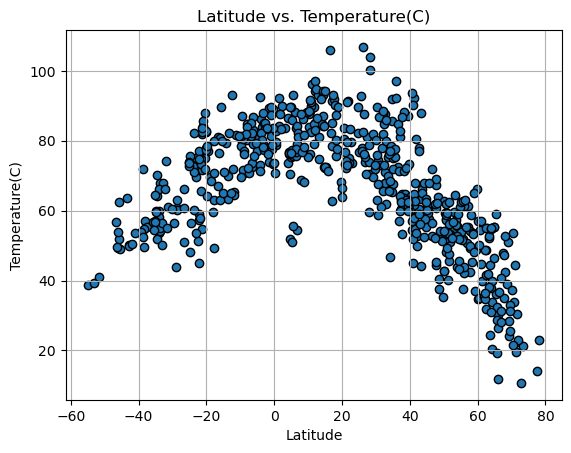

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature(C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

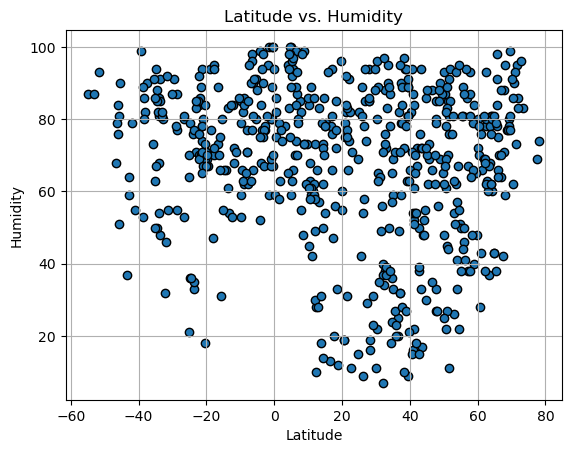

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

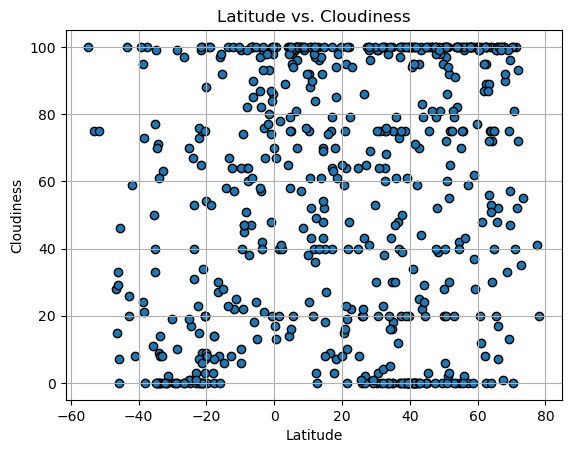

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

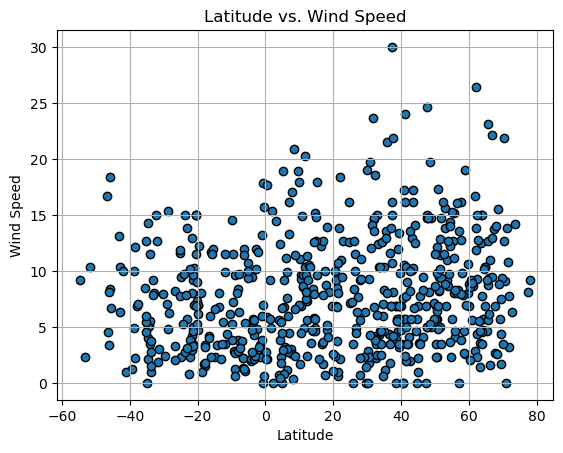

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,isla mujeres,21.2311,-86.7310,73.45,82,95,8.46,MX,1684218051
3,gudivada,16.4500,80.9833,106.00,13,9,12.24,IN,1684218051
4,muisne,0.6000,-80.0333,78.82,86,100,5.91,EC,1684218051
5,san jose,37.3394,-121.8950,63.00,79,20,30.00,US,1684217779
8,albany,42.6001,-73.9662,60.58,50,95,1.99,US,1684218052


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chake chake,-5.2459,39.7666,80.62,80,24,10.74,TZ,1684218051
1,boyolangu,-8.1181,111.8935,80.28,71,64,8.39,ID,1684218051
6,rikitea,-23.1203,-134.9692,75.13,71,3,5.73,PF,1684218052
7,birigui,-21.2886,-50.3400,54.68,78,0,5.01,BR,1684218052
10,bluff,-46.6000,168.3333,56.62,68,28,16.71,NZ,1684218052


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6563850183786035


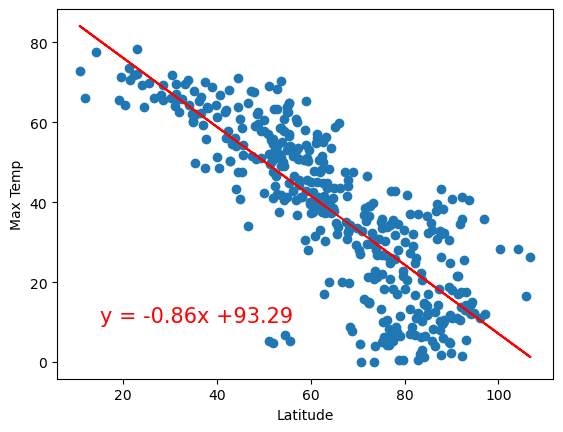

In [54]:
# Linear regression on Northern Hemisphere
y_values = northern_hemi_df["Max Temp"]
x_values = northern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Max Temp", (15,10) )

The r-value is: 0.5962851905421854


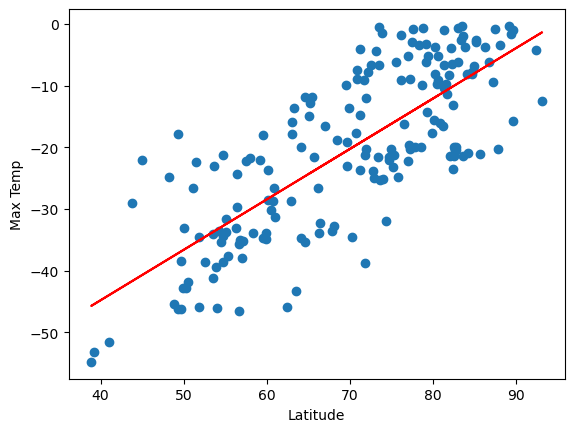

In [57]:
# Linear regression on Southern Hemisphere
y_values = southern_hemi_df["Max Temp"]
x_values = southern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Max Temp", (-45,10) )

**Discussion about the linear relationship:** Northern hemisphere shows a negative correlation between maximum temperature and latitude while the southern hemisphere shows no correlation between maximum temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 3.371223818065577e-07


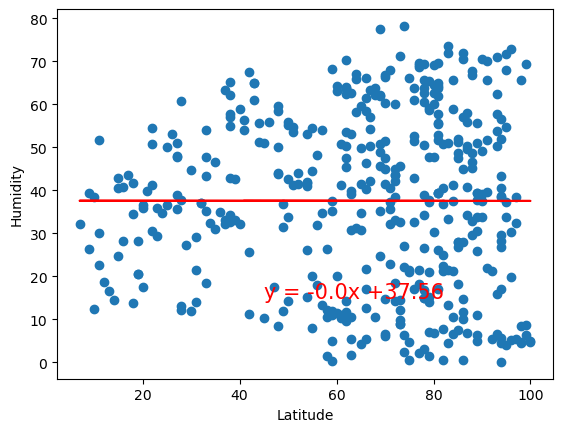

In [70]:
# Northern Hemisphere
y_values = northern_hemi_df["Humidity"]
x_values = northern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Humidity", (45,15) )

The r-value is: 0.010816235245697144


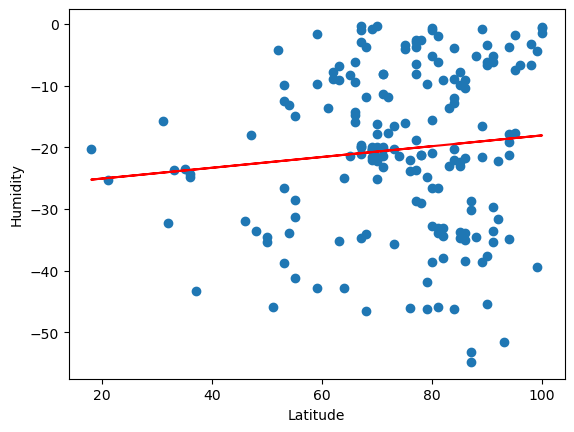

In [71]:
# Southern Hemisphere
y_values = southern_hemi_df["Humidity"]
x_values = southern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Humidity", (-50,30) )

**Discussion about the linear relationship:** In the northern hemisphere, as the latitude increases the humidity also increases. And again the southern hemisphere shows no correlation between humidity and latitude.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00023341070802075856


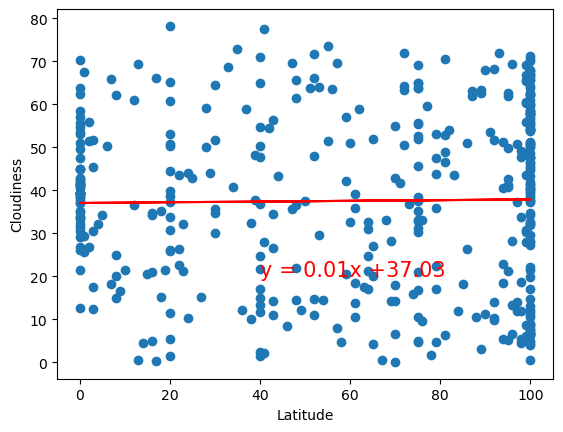

In [74]:
# Northern Hemisphere
y_values = northern_hemi_df["Cloudiness"]
x_values = northern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Cloudiness", (40,20) )

The r-value is: 0.10848917286379967


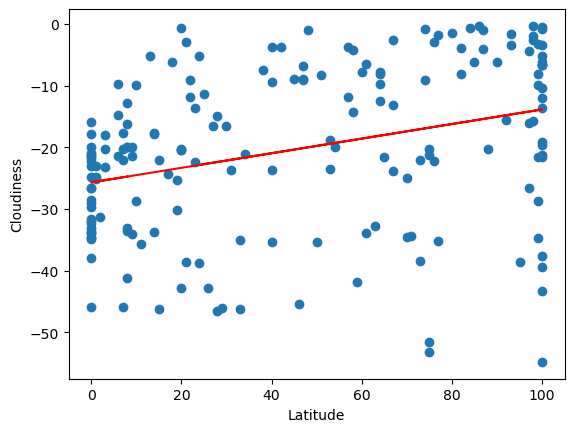

In [86]:
# Southern Hemisphere
y_values = southern_hemi_df["Cloudiness"]
x_values = southern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Cloudiness", (-40,20) )

**Discussion about the linear relationship:   The r-value is: 0.108489 on southern hemisphere while it is 0.000233 on northern hemisphere.It shows there is no correaltion between cloudiness and latitude for both.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012456452511094224


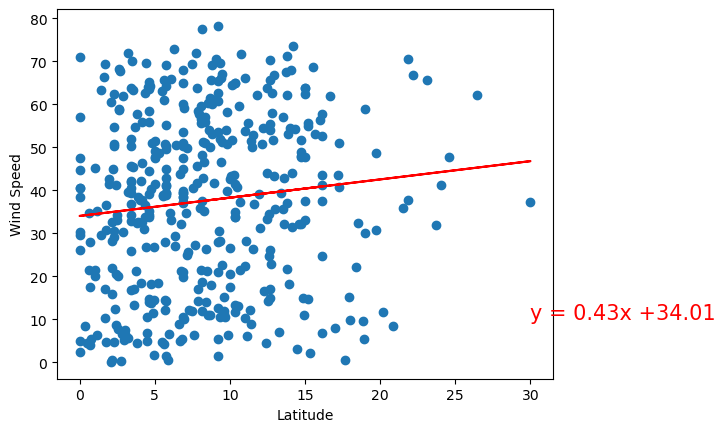

In [80]:
# Northern Hemisphere
y_values = northern_hemi_df["Wind Speed"]
x_values = northern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Wind Speed", (30,10) )

The r-value is: 0.014989841661423402


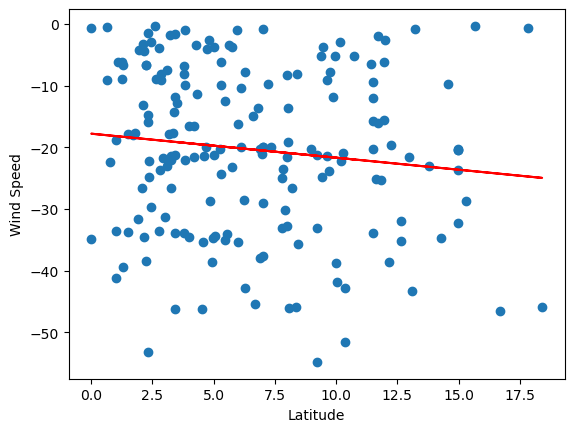

In [84]:
# Southern Hemisphere
y_values = southern_hemi_df["Wind Speed"]
x_values = southern_hemi_df["Lat"]
plot_linear_regression(y_values, x_values, "Wind Speed", (-20,15) )

**Discussion about the linear relationship:
  From the above,both northern and southern hemisphere it shows there is no correlation between latitude and wind speed.